In [57]:
%load_ext autoreload
import deepdish as dd
import numpy as np
import pandas as pd
import json
from skimage import io
from notebook_utilities.display import stack_browser, display_array
from matplotlib import pyplot as plt
from fimpy.core.split_dataset import H5SplitDataset
%matplotlib notebook
from pathlib import Path
from scipy.ndimage import median_filter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%autoreload
from fimpy.registration.reg_from_skimage import register_translation
from fimpy.registration.volume import (
    align_block_shift,
    find_shifts_sobel,
    shift_stack,
    sobel_stack)
from fimpy.registration.plane import align_single_planes_sobel, displacement_between_planes

# Check alignment function

In [2]:
path = Path(r"J:\_Shared\experiments\E0032_luminance\v01_flashes\IO\181024_f1\181024_f1_io6fef05_6dpf_im\src")
ds = H5SplitDataset(path)

c:\users\lpetrucco\code\notebook_utilities\notebook_utilities\display.py:109: RuntimeWarning: divide by zero encountered in true_divide
  image = fromarray((image*(255/(vmax-vmin))).astype(np.uint8), mode='L')
c:\users\lpetrucco\code\notebook_utilities\notebook_utilities\display.py:109: RuntimeWarning: invalid value encountered in multiply
  image = fromarray((image*(255/(vmax-vmin))).astype(np.uint8), mode='L')


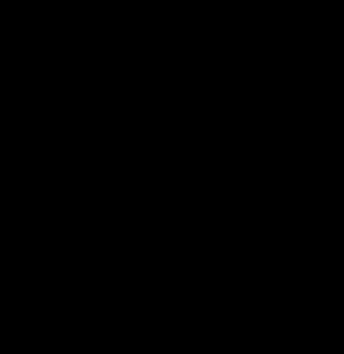

In [3]:
i = 30
plane = dd.io.load(path / "src_{0:0>3}.h5".format(i), "/stack_4D")
display_array(plane[0,0,:,:])

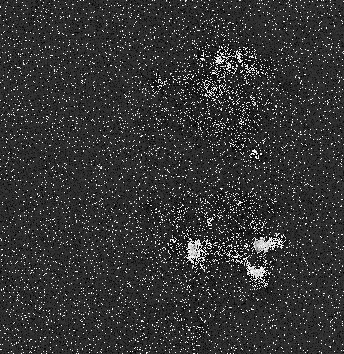

In [7]:
display_array(np.max(plane[:,0,:,:], 0))

### Sobel filtering of the plane

In [68]:
prefilter_sigma = 4.3
ref = np.mean(ds[:10,:,:,:,], 0)
full_sob = sobel_stack(ref, prefilter_sigma)

In [69]:
display_array(full_sob)

A Jupyter Widget

<function notebook_utilities.display.display_array.<locals>.browse>

Calculate fft reference

In [195]:
full_fft_reference = np.fft.fftn(sobel_stack(ref, prefilter_sigma))

In [175]:
plane_sob = sobel_stack(plane[:,0,:,:].astype(np.float), prefilter_sigma)

In [ ]:
display_array(sobel_stack(plane[-1, :,:,:].astype(float), prefilter_sigma) - full_sob[i:i+1,:,:])

### Try registration

In [200]:
find_shifts_sobel(plane[:1, :, :, :], np.fft.fftn(sobel_stack(ds[-1, i:i+1, :, :], prefilter_sigma)), prefilter_sigma)

array([ 0. , -3.1,  0.6])

In [37]:
sample_im_f = np.fft.fftn(sobel_stack(plane[0, :,:,:], prefilter_sigma))
sample_im_l = np.fft.fftn(sobel_stack(plane[-1, :,:,:], prefilter_sigma))

In [52]:
register_translation(sample_im_f, np.fft.fftn(full_sob[i:i+1,:,:]), space="fourier", upsample_factor=10, return_error=False)

array([0., 0., 0.])

In [53]:
register_translation(sample_im_l, np.fft.fftn(full_sob[i:i+1,:,:]), upsample_factor=10, space="fourier", return_error=False)

array([ 0. ,  2.9, -0.5])

In [54]:
register_translation(sample_im_l, sample_im_f, upsample_factor=10, space="fourier", return_error=False)

array([ 0. ,  2.9, -0.5])

### Test actual fimpy function

In [167]:
find_shifts_sobel(plane[-2, :, :,:], np.fft.fftn(full_sob[i:i+1,:,:]), prefilter_sigma)

array([   0. ,   10.5, -150.8])

In [ ]:
align_single_planes

In [ ]:
def find_shifts_sobel_plane(plane, fft_ref, prefilter_sigma, window):
    

def _get_plane_shifts(ds, reference, plane_i, prefilter_sigma):
    find_shifts_sobel(ds[:,:,:], np.fft.fftn(full_sob[i+1:i+2,:,:]), prefilter_sigma)

In [202]:
i = 30
stack = ds[:,j:j+1,:,:]
ref = np.mean(ds[:10,:,:,:], 0)

In [216]:
find_shifts_sobel(stack[-1:, :, :, :], np.fft.fftn(sobel_stack(ref[i:i+1, :, :], prefilter_sigma)), prefilter_sigma)

array([ 0. ,  3. , -0.5])

In [224]:
sob_ref = sobel_stack(ref, prefilter_sigma)

In [229]:
a, shifts = align_single_planes_sobel(stack, np.fft.fftn(sob_ref[i:i+1, :, :]), 
                                      prefilter_sigma=prefilter_sigma, upsample_factor=10, maxshift=15)

In [ ]:
display_array(a)

### Alignment between planes

In [ ]:
display_array(ref)

In [337]:
%autoreload
from fimpy.registration.plane import align_single_planes_sobel, displacement_between_planes, shift_planes
from scipy.ndimage.interpolation import shift

In [258]:
shifts = displacement_between_planes(ref, upsampling=10)

In [ ]:
display_array(shift_planes(ref, shifts))

In [340]:
meanvolume = ref # sobel_stack(ref, prefilter_sigma)
num_planes = meanvolume.shape[0]
centre_plane = int(num_planes // 2)

In [341]:
aligned = np.empty_like(meanvolume)

In [345]:
shifts = np.zeros((meanvolume.shape[0], 2))

for i in range(centre_plane, meanvolume.shape[0]-1):
    s, error, diffphase = register_translation(meanvolume[i,:,:], meanvolume[i+1,:,:], 10)
    shifts[i+1,:] = shifts[i,:] + s
for i in range(centre_plane, 0, -1):
    s, error, diffphase = register_translation(meanvolume[i,:,:], meanvolume[i-1,:,:], 10)
    shifts[i-1,:] = shifts[i,:] + s

In [ ]:
display_array(shift_planes(ds[:10,:,:,:], dict(shifts=shifts)))

## Combine all alignments for final function

In [3]:
%load_ext autoreload

In [4]:
% autoreload
from fimpy.registration.plane import align_single_planes_sobel, displacement_between_planes, shift_planes
from fimpy.registration.volume import sobel_stack

In [5]:
path = Path(r"J:\_Shared\exp22_2p\EC\imported\180526 f1\src")
ds = H5SplitDataset(path)
ref = np.mean(ds[:10,:,:,:], 0)
prefilter_sigma = 3.3
upsampling=10

NameError: name 'Path' is not defined

In [6]:
sob_ref = sobel_stack(ref, prefilter_sigma)

In [30]:
%%time
whole_stack = ds[:,:,:,:][::50, :,:,:]

MemoryError: 

In [26]:
%%time

for i in whole_stack.shape[:, ]
shifts = align_single_planes_sobel(p[::10, :,:,:], np.fft.fftn(sob_ref[i:i+1, :, :]), 
                                   prefilter_sigma=prefilter_sigma, upsample_factor=10, maxshift=15)

Wall time: 2.84 s
